In [3]:

from SQsearch import RisingLimb, FallingLimb
from farPoint import SWRCurves, bcdPoints
from ana_new import trans_ana
from two_step import two_step_overland
from steady_fit import fit_steady
import numpy as np
import matplotlib.pyplot as plt

SWR = SWRCurves(100.0, 201, 0.5, 0.1, 0.01, 2, 4, useFile='ks1_SWRrec.pick')
SWR.fitPT()

ie0 = 25.0
ie1 = 10.0
ie2 = 40.0
ToC = 270.

ca = two_step_overland(ie0, ie1, ie2, 100.0, 201, 0.5, 0.1, 0.01)
ca.ie1_duration(ToC)
ca.run()

SWC = bcdPoints(ca)
c1 = ie1/ie2
qBD = SWC[-1][1]/SWC[0][1]
sBD = SWC[-1][2]/SWC[0][2]
SWC = np.array(SWC)

curve, t = SWR.interpCurve(qBD, sBD)

curve[:, 0] = curve[:, 0]*SWC[0][1]
curve[:, 1] = curve[:, 1]*SWC[0][2]


ie0=25.00
ie1=10.00
ie2=40.00
ToC=270.00


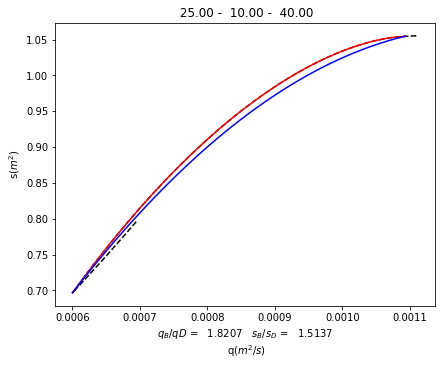

In [4]:
plt.figure(figsize=[6.8, 5.2])
plt.plot(ca.q_curve[:, 1], ca.s_curve[:, 1], '--k')
plt.plot(SWC[:, 1], SWC[:, 2], '-r')
plt.plot(curve[:, 0], curve[:, 1], '-b')
title = '%6.2f' % ie0 + ' - ' + '%6.2f' % ie1 + ' - ' + '%6.2f' % ie2
plt.title(title)
X_LABEL = '$q_B/qD$ = %8.4f' % qBD + '   ' + '$s_B/s_D$ = %8.4f' % sBD +'\n q($m^2/s$)'
plt.xlabel(X_LABEL)
plt.ylabel('s($m^2$)')
plt.savefig('new_SWC_1.png', dpi=120)
plt.show()